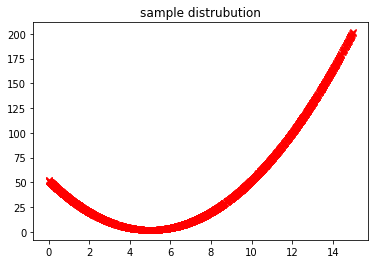

W:
[[10.56877939]]
B:
[[-21.46076428]]
欠拟合


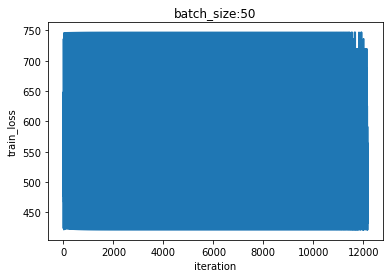

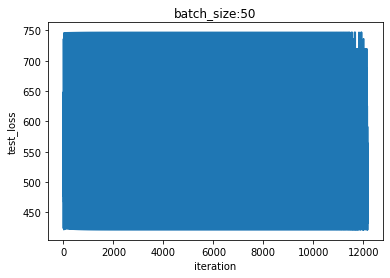

W:
[[-19.99669282   1.99981807]]
B:
[[51.98778777]]


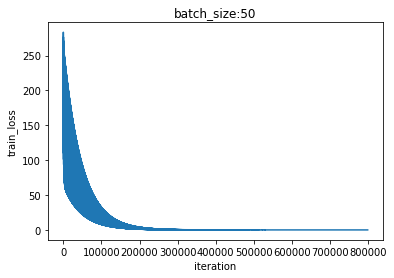

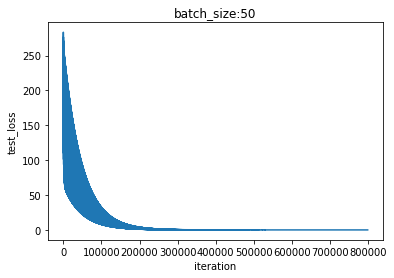

W:
[[ 2.09869442 -0.81615327  0.10899155]]
B:
[[3.71862151]]
过拟合


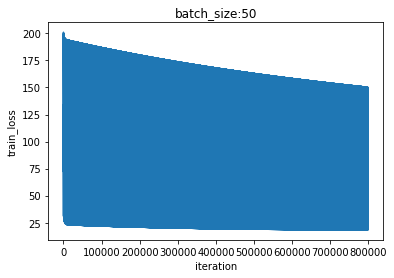

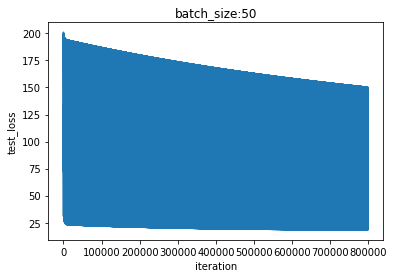

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#样本容量大小
size=2500

#训练集大小
k=(int)(0.8*size)

#学习率
def SetRate(flag):
    eta=2
    if flag==0:
        eta=0.01
    elif flag==1:
        eta=0.0001
    elif flag==2:
        eta=0.000001
    return eta

#设置数据
def SetData():
    x_data=np.random.rand(size)
    y_data=np.random.rand(size)
    x_data=15*x_data
    for i in range(len(x_data)):
        y_data[i]=2*x_data[i]**2-20*x_data[i]+52
        #y_data[i]=2*x_data[i]+22
    return x_data.reshape(1,-1),y_data.reshape(1,-1)

class CData(object):
    def __init__(self,loss,w,b,epoch,iteration):
        self.loss=loss
        self.w=w
        self.b=b
        self.epoch=epoch
        self.iteration=iteration
        
#数据离散化
def shuffle(X,Y):
    num_example=X.shape[1]
    rank=np.arange(0,num_example)
    np.random.shuffle(rank)
    X_shuffle=[]
    Y_shuffle=[]
    for i in rank:
        X_shuffle.append(X[:,i])
        Y_shuffle.append(Y[:,i])
    X_shuffle=np.transpose(X_shuffle)
    Y_shuffle=np.transpose(Y_shuffle)
    return X_shuffle,Y_shuffle

#初始化权向量
def InitialWeight(num_input,num_output):
    W=np.zeros((num_input,num_output))
    B=np.zeros((num_input,1))
    return W,B

def Set_x(batch_x,flag):
    dim_y=batch_x.shape[1]
    if flag==0:
        x=batch_x
    elif flag==1:
        x=batch_x**2
        x=np.r_[batch_x,x].reshape(2,dim_y)
    elif flag==2:
        x=batch_x**2
        y=batch_x**3
        x=np.r_[batch_x,x]
        x=np.r_[x,y].reshape(3,dim_y)
    return x
    
def ForwordCalculationBatch(W,B,x):
    Z=np.dot(W,x)+B
    return Z

def BackPropagationBatch(batch_x,batch_y,batch_z,x):
    m=batch_x.shape[1]
    dZ=batch_z-batch_y 
    dB=dZ.sum(axis=1,keepdims=True)/m
    dW=np.dot(dZ,x.T)/m
    return dW,dB

def UpdataWeight(w,b,dW,dB,eta):
    w=w-eta*dW
    b=b-eta*dB
    return w,b

def CheckLoss(W,B,X,Y):
    m=X.shape[1]
    Z=np.dot(W,X)+B
    e=(Y-Z)**2
    return e.sum()/m/2
    
def GetBatchSamples(X,Y,batch_size,iteration):
    num_feature=X.shape[0]
    start=batch_size*iteration
    end=start+batch_size
    batch_x=X[0:num_feature,start:end].reshape(num_feature,batch_size)
    batch_y=Y[0,start:end].reshape(1,batch_size)
    return batch_x,batch_y

def GetMinimaLossData(dict_loss):
    key=sorted(dict_loss())[0]
    w=dict_loss[key].w
    b=dict_loss[key].b
    return w,b

def ShowIterLossHistory(dict_iter_loss,batch_size,flag):
    loss=[]
    for key in dict_iter_loss:
        loss.append(key)
    plt.title("batch_size:"+str(batch_size))
    plt.xlabel("iteration")
    if flag==0:
        plt.ylabel("train_loss")
    elif flag==1:
        plt.ylabel("test_loss")
    plt.plot(loss[1000:1000000])
    plt.show()

if __name__=='__main__':    
    max_epoch=20000
    Batchsize=[50]
    X,Y=SetData()
    shuffle(X,Y)
    test_num=size-k
    test_x=X[0,k:size].reshape(1,test_num)
    test_y=Y[0,k:size].reshape(1,test_num)

    for i in range(len(X)):
        plt.plot(X[i],Y[i],'rx')
    plt.title("sample distrubution")
    plt.show()
    
    for i in range(0,3):
        eta=SetRate(i)
        TX=Set_x(test_x,i)
        for batch_size in Batchsize:
            W,B=InitialWeight(1,1+i)
            max_iteration=(int)(k/batch_size)
            dict_test_loss={}
            dict_train_loss={}
            for epoch in range(max_epoch):
                sum_loss=0
                for iteration in range(max_iteration):
                    batch_x,batch_y=GetBatchSamples(X,Y,batch_size,iteration)
                    x=Set_x(batch_x,i)
                    batch_z=ForwordCalculationBatch(W,B,x)
                    dW,dB=BackPropagationBatch(batch_x,batch_y,batch_z,x)
                    W,B=UpdataWeight(W,B,dW,dB,eta)
                    loss=CheckLoss(W,B,x,batch_y)
                    test_loss=CheckLoss(W,B,TX,test_y)
                    dict_train_loss[loss]=CData(loss,W,B,epoch,iteration)
                    dict_test_loss[loss]=CData(test_loss,W,B,epoch,iteration)
                    sum_loss+=loss
            print("W:")
            print(W)
            print("B:")
            print(B)
            if i==0:
                print("欠拟合")
            elif i==2:
                print("过拟合")
            ShowIterLossHistory(dict_train_loss,batch_size,0)
            ShowIterLossHistory(dict_test_loss,batch_size,1)